In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 kB 25.0 MB/s eta 0:00:00


In [ ]:
import ultralytics
from ultralytics import YOLO

# Check the version
print(ultralytics.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.37


In [ ]:
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.4/606.4 kB 32.3 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path to the labels folder (update this to your actual path)
labels_folder = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/labels'

# Function to check label format
def validate_label_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line_num, line in enumerate(lines, start=1):
            parts = line.strip().split()
            if len(parts) != 5:
                print(f"Incorrect format in {file_path}, line {line_num}: {line.strip()}")
                return False
            try:
                class_id = int(parts[0])  # Class ID must be an integer
                bbox = [float(x) for x in parts[1:]]  # Rest must be floats
                if not all(0 <= x <= 1 for x in bbox):  # Ensure bbox values are normalized
                    print(f"Out-of-range values in {file_path}, line {line_num}: {line.strip()}")
                    return False
            except ValueError:
                print(f"Non-numeric value in {file_path}, line {line_num}: {line.strip()}")
                return False
    return True

# Loop through all label files
for file_name in os.listdir(labels_folder):
    if file_name.endswith('.txt'):  # Ensure it's a label file
        file_path = os.path.join(labels_folder, file_name)
        if validate_label_file(file_path):
            print(f"File {file_name} is valid.")
        else:
            print(f"File {file_name} has errors.")


File frame_0087_jpg.rf.6911e25ecb00139750616b606571e714.txt is valid.
File frame_0435_jpg.rf.b64a627a937f4b21417074ddc983c184.txt is valid.
File frame_0435_jpg.rf.2e3980e2d44f690fca901bbe71981b7a.txt is valid.
File frame_0002_jpg.rf.a929cd43bfa0953ace4ea9ea00fa9ba7.txt is valid.
File frame_0182_jpg.rf.24ccc1dc2e78b06ec38094471560e981.txt is valid.
File frame_1001_jpg.rf.d499e6c10b2608d56531ba7694c588ab.txt is valid.
File frame_0654_jpg.rf.a078b9fb055bd8aabc4ea0269670ec31.txt is valid.
File frame_0786_jpg.rf.815a596695f2267e033ce6394667c19d.txt is valid.
File frame_0725_jpg.rf.47dda94b1ae3d1c9dac287942b0dba0f.txt is valid.
File frame_0691_jpg.rf.5ccee83c900423ebc9201d81db329e7e.txt is valid.
File frame_0786_jpg.rf.9c16f9a4a00bb016a85338355e44073d.txt is valid.
File frame_1003_jpg.rf.9875f8650b93b769ff544d849f453b7c.txt is valid.
File frame_1005_jpg.rf.72eca626ce1bf4c1e541ab4a6409f6a9.txt is valid.
File frame_1006_jpg.rf.1b9373a850a38c393fedb566b102513c.txt is valid.
File frame_1008_jpg.

In [ ]:

model = YOLO('yolov9t.pt')

results = model.train(
    data='/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data.yaml',
    epochs=200,
    batch=32,
    verbose=True
)

100%|██████████| 4.74M/4.74M [00:00<00:00, 89.2MB/s]


Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov9t.pt, data=/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data.yaml, epochs=20, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

100%|██████████| 755k/755k [00:00<00:00, 20.5MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7872  ultralytics.nn.modules.block.ELAN1           [32, 32, 32, 16]              
  3                  -1  1     18560  ultralytics.nn.modules.block.AConv           [32, 64]                      
  4                  -1  1     65216  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 64, 64, 32, 3]           
  5                  -1  1     55488  ultralytics.nn.modules.block.AConv           [64, 96]                      
  6                  -1  1    145824  ultralytics.nn.modules.block.RepNCSPELAN4    [96, 96, 96, 48, 3]           
  7                  -1  1    110848  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 90.6MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/labels.cache... 136 images, 2 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.53G      1.472      4.258      1.107        270        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         28        563    0.00146      0.124     0.0137     0.0047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.35G      1.413      3.995      1.035        173        640: 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         28        563    0.00654      0.228     0.0358     0.0197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      6.61G      1.396       3.35     0.9647        230        640: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         28        563     0.0106      0.257     0.0497     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      6.49G      1.439      2.338     0.9598        210        640: 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         28        563     0.0196      0.337       0.13     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      6.66G      1.344      1.851     0.9491        186        640: 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         28        563      0.649      0.166      0.179      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      6.48G      1.304      1.589     0.9379        228        640: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         28        563      0.017      0.367      0.152     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      6.29G      1.259      1.476      0.962        118        640: 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         28        563     0.0368      0.456      0.229      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       6.3G      1.297      1.399     0.9646        112        640: 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         28        563     0.0483      0.475      0.318      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.92G      1.276      1.332     0.9458        333        640: 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         28        563     0.0467      0.513      0.333      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.02G      1.203      1.243     0.9259        205        640: 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         28        563      0.209      0.491      0.367      0.216


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.89G      1.152      1.105     0.9241        154        640: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         28        563      0.743      0.312      0.385      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.93G      1.155      1.102     0.9266        156        640: 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         28        563       0.05      0.571      0.435      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.63G      1.131      1.059     0.9136        159        640: 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


                   all         28        563      0.865       0.12      0.434      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.91G      1.116      1.051     0.9063        121        640: 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         28        563       0.87      0.135      0.449      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.93G       1.12      1.041     0.9094        194        640: 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         28        563      0.878      0.167      0.461      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.91G      1.094      1.004     0.9028        170        640: 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         28        563      0.801      0.257      0.479      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.91G      1.081      1.009     0.8992        145        640: 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         28        563      0.811      0.298      0.491      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.94G      1.107      1.004      0.908        231        640: 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         28        563      0.812      0.359      0.506      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.64G      1.064      1.037     0.8928        132        640: 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         28        563      0.782      0.383      0.508      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.84G      1.064     0.9526     0.9019        231        640: 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         28        563       0.77      0.414      0.515      0.341



20 epochs completed in 0.022 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 4.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 4.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv9t summary (fused): 486 layers, 1,971,759 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         28        563       0.77      0.414      0.515      0.341
                   Bus          6          6      0.634      0.167      0.228      0.171
                   Car         23        398      0.824       0.66      0.786      0.527
            Motorcycle         18         92      0.896      0.373       0.57      0.299
                Pickup         22         59      0.934      0.373      0.517      0.337
                 Truck          8          8      0.562        0.5      0.475      0.373
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


In [ ]:
# Path to the directory where YOLO saves training outputs
runs_path = '/content/runs/detect'

# Find the most recent training directory
latest_run = max([os.path.join(runs_path, d) for d in os.listdir(runs_path)], key=os.path.getmtime)

# Path to the best weights file
best_weights_path = os.path.join(latest_run, 'weights', 'best.pt')

# Load the model with the found best weights
model = YOLO(best_weights_path)

print(f"Loaded model from: {best_weights_path}")

metrics = model.val(
    data='/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data.yaml',
    split='test'
)

# Print evaluation metrics
print(metrics)

Loaded model from: /content/runs/detect/train/weights/best.pt
Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv9t summary (fused): 486 layers, 1,971,759 parameters, 0 gradients, 7.6 GFLOPs


val: Scanning /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/test/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.96s/it]


                   all         13        254      0.836      0.358      0.453      0.331
                   Bus          5          5          1          0     0.0446     0.0182
                   Car         12        179      0.781      0.657      0.742      0.519
            Motorcycle          8         38      0.932      0.364      0.475      0.269
                Pickup          8         29      0.753      0.105      0.339      0.248
                 Truck          3          3      0.715      0.667      0.665      0.599
Speed: 0.2ms preprocess, 20.0ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dd5a683b610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results

In [ ]:
print(vars(metrics))  # Lists the object's attributes and their values


{'save_dir': PosixPath('runs/detect/val'), 'plot': True, 'on_plot': <bound method BaseValidator.on_plot of <ultralytics.models.yolo.detect.val.DetectionValidator object at 0x7dd6e02f7a90>>, 'names': {0: 'Bus', 1: 'Car', 2: 'Motorcycle', 3: 'Pickup', 4: 'Truck'}, 'box': ultralytics.utils.metrics.Metric object with attributes:

all_ap: array([[   0.044571,    0.044571,    0.044571,    0.023998,    0.023998,           0,           0,           0,           0,           0],
       [    0.74232,     0.72747,     0.71136,     0.69637,     0.66077,     0.59979,     0.51318,     0.40135,     0.13234,   0.0077235],
       [    0.47487,     0.46711,     0.44847,     0.44847,     0.32527,     0.23498,     0.16303,    0.093064,     0.03679,           0],
       [    0.33933,     0.33504,     0.33298,     0.32103,     0.32103,     0.29381,     0.26831,     0.14211,    0.094501,    0.027044],
       [     0.6653,      0.6653,      0.6653,      0.6653,      0.6653,      0.6653,      0.6653,      0.66

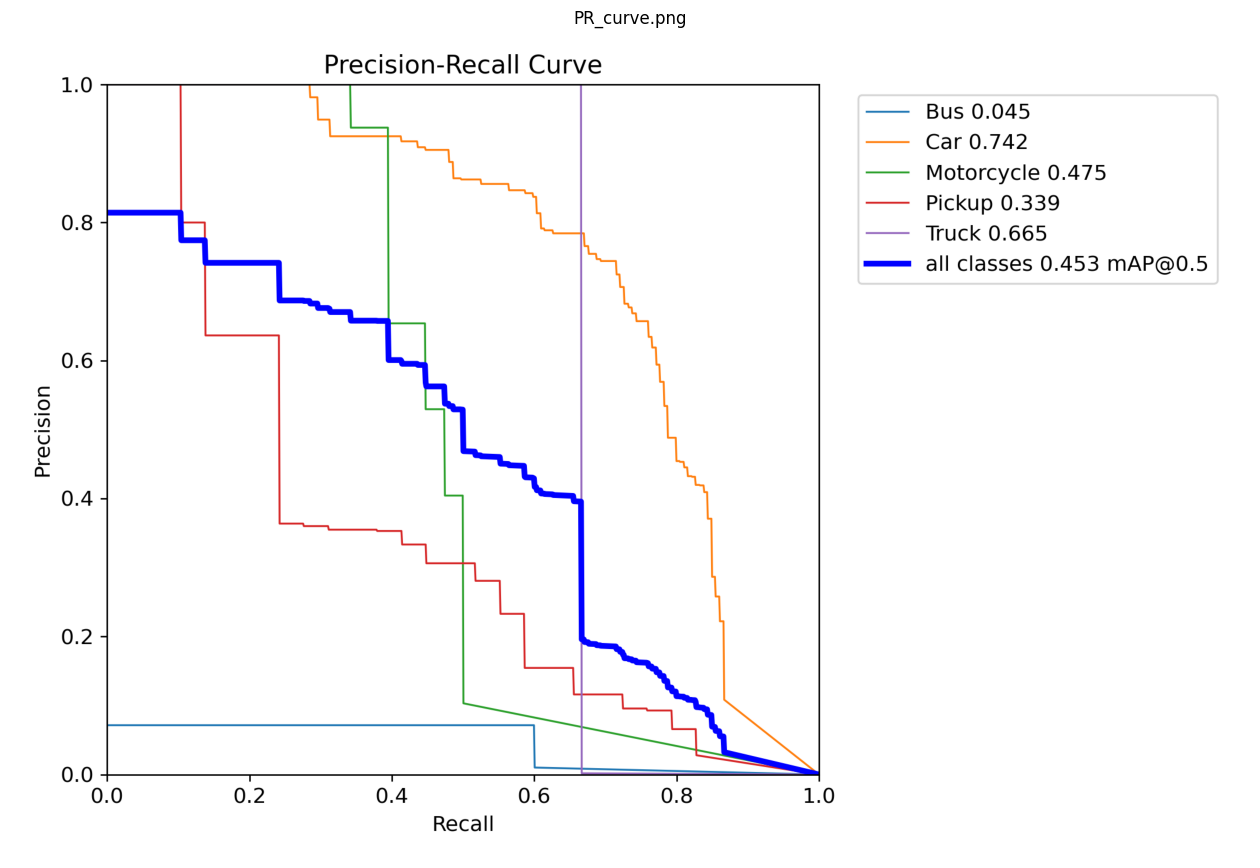

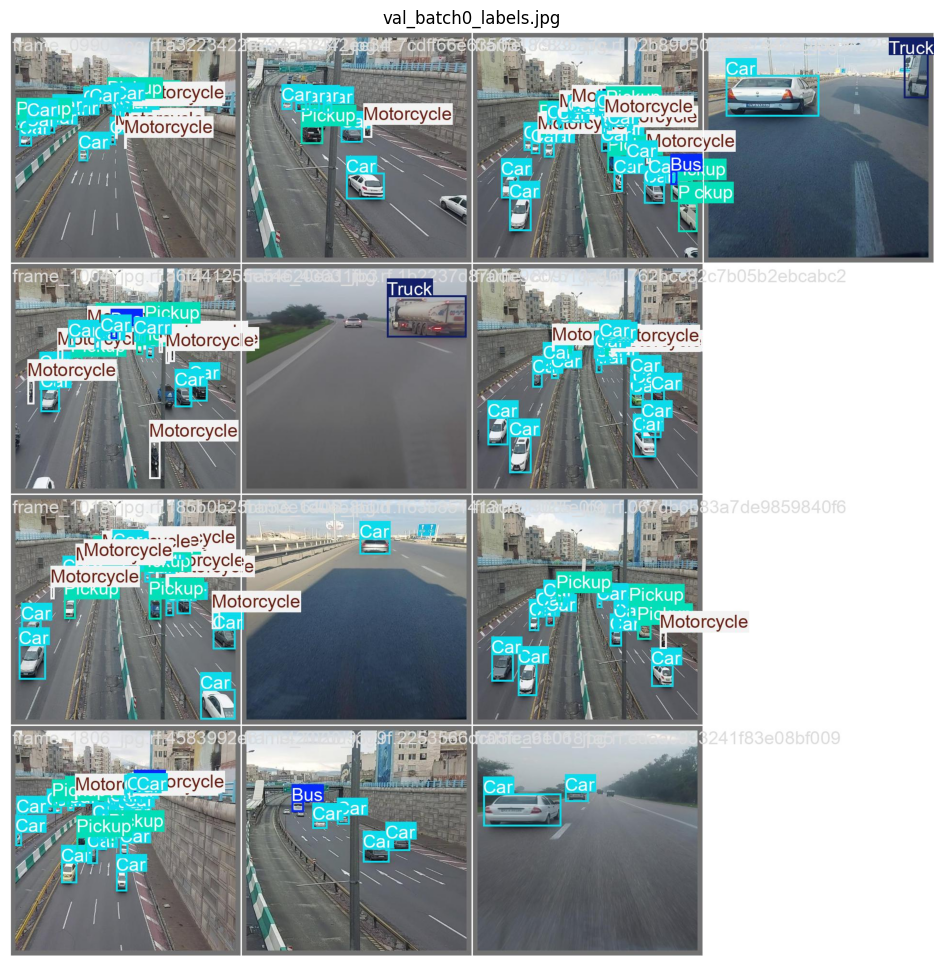

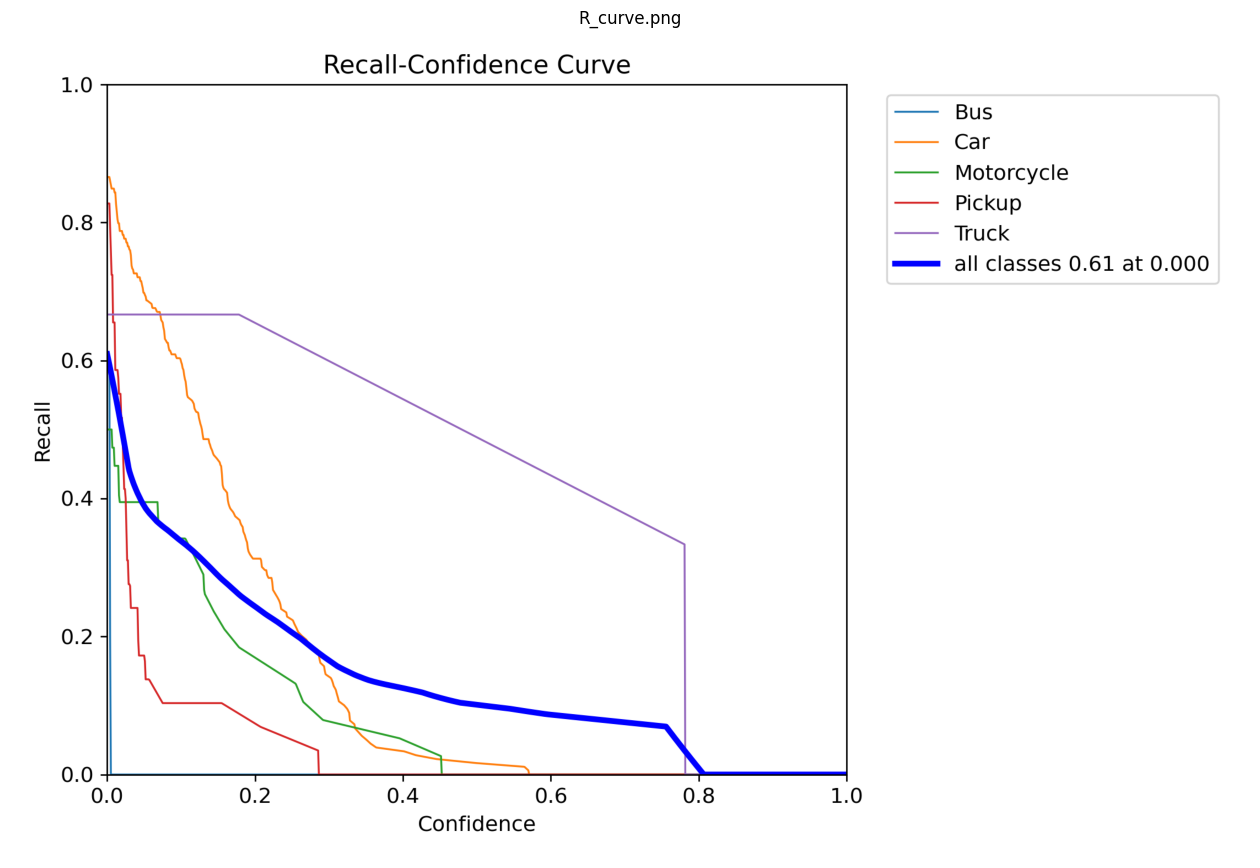

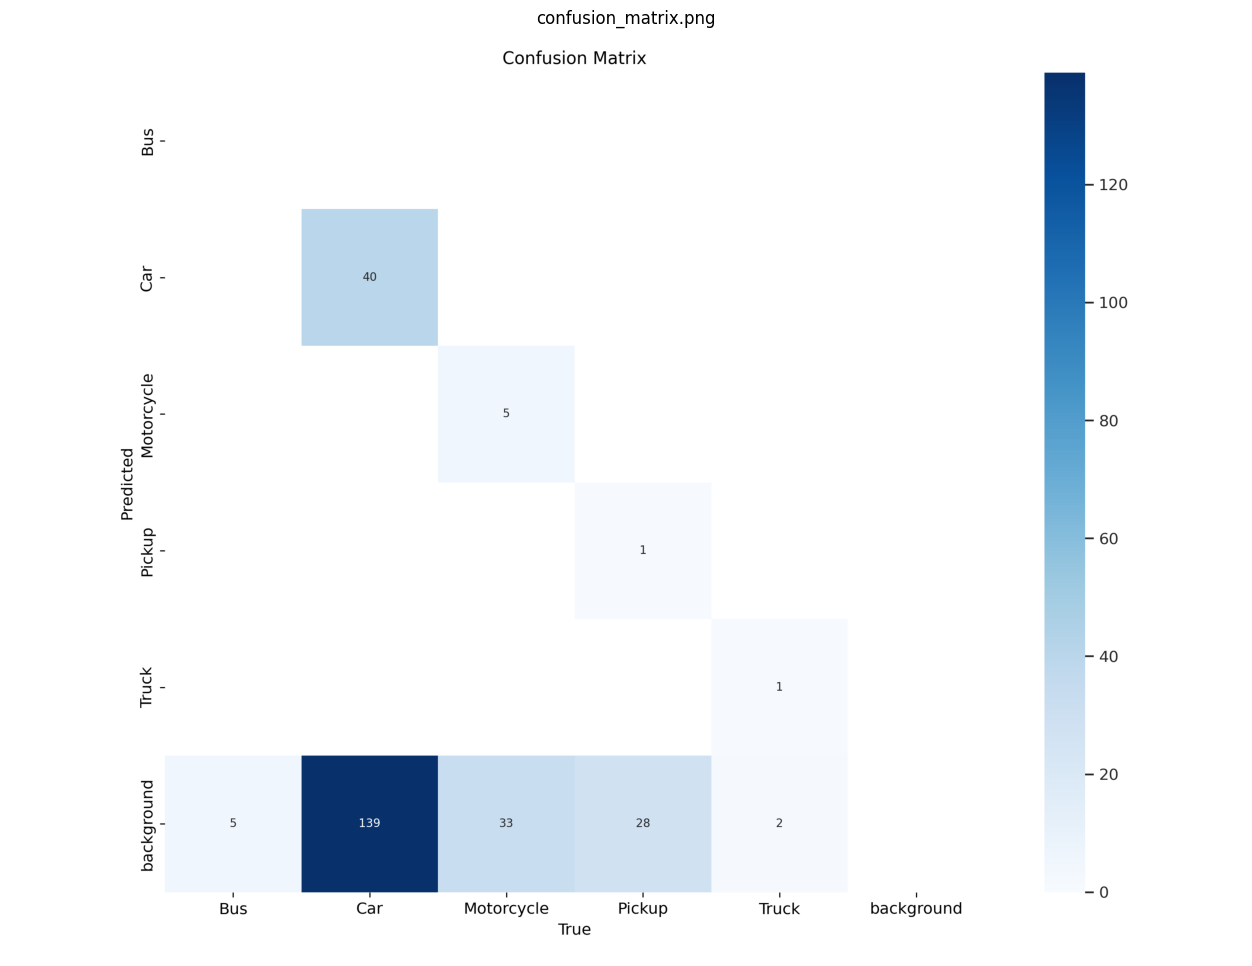

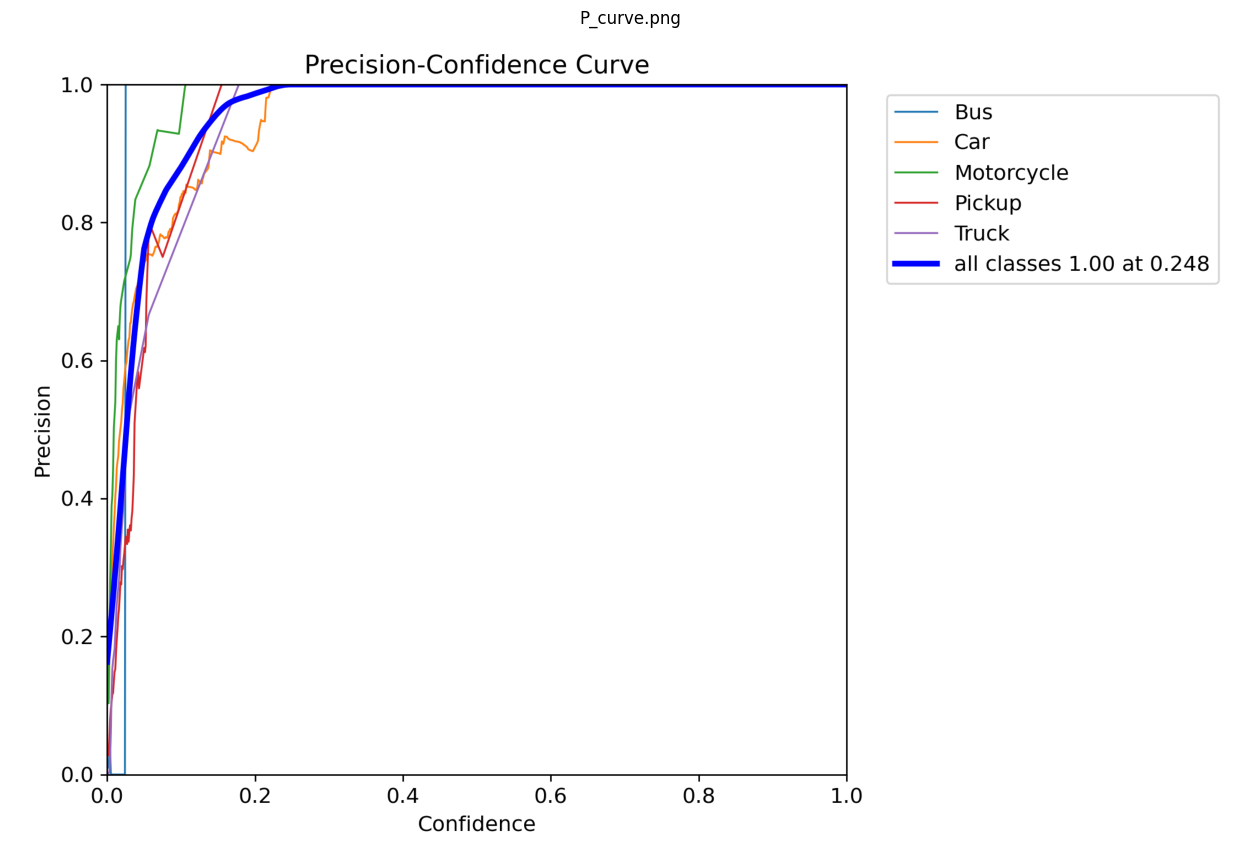

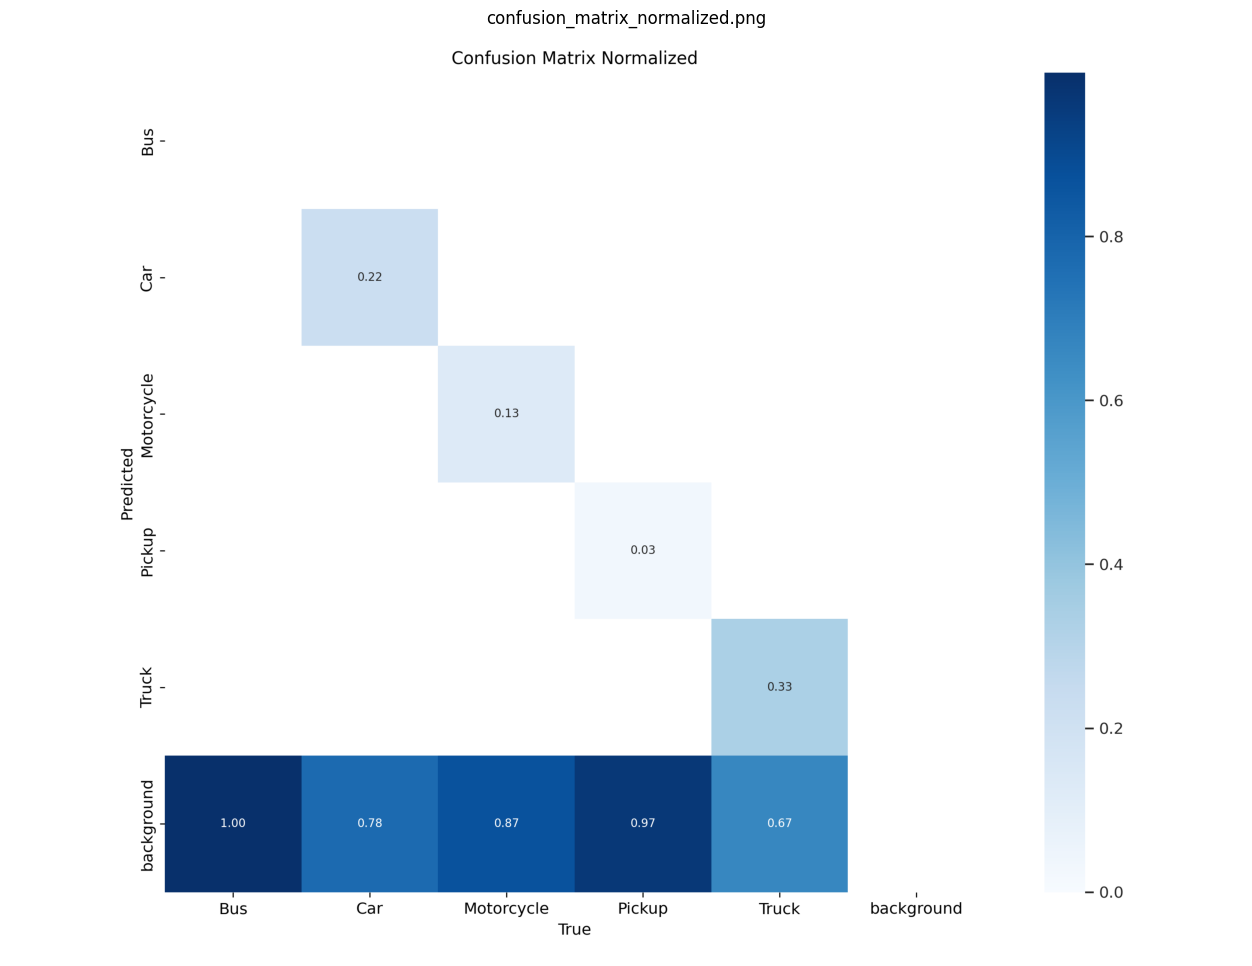

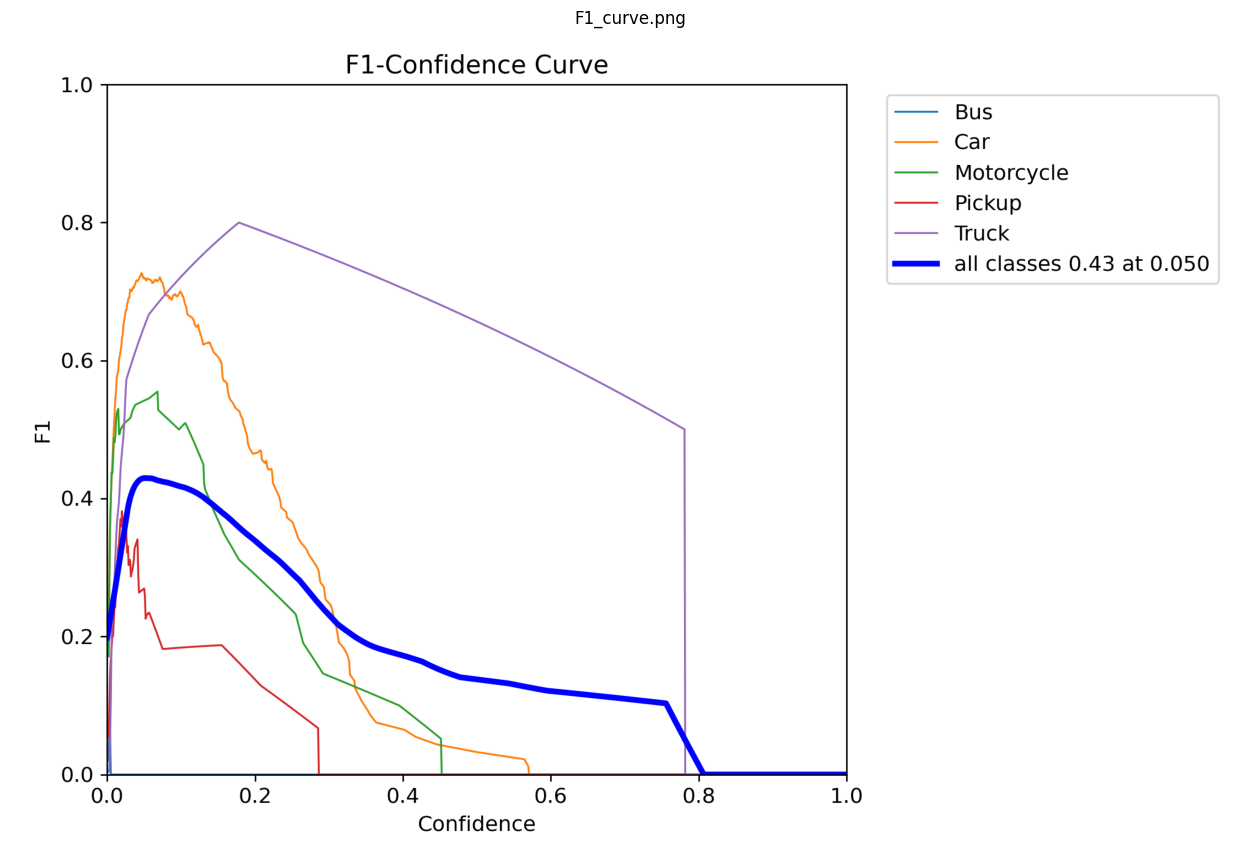

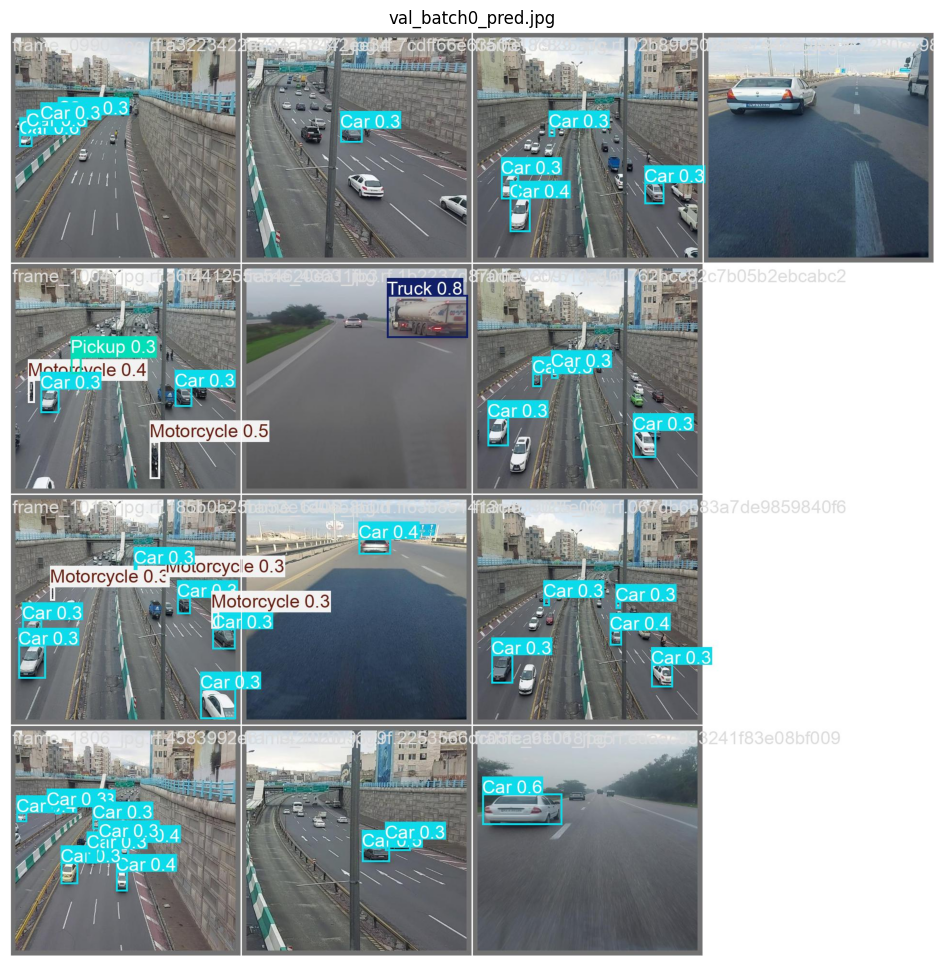

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# Ensure the save directory path is valid and absolute
folder_path = str(metrics.save_dir)  # Convert to string if necessary

# List all image files in the directory
images = [file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg'))]

# Display the images
for image in images:
    img_path = os.path.join(folder_path, image)
    img = Image.open(img_path)
    plt.figure(figsize=(16, 12))
    plt.title(image)
    plt.imshow(img)
    plt.axis('off')  # Turn off axes for better visualization
    plt.show()



image 1/1 /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/test/images/frame_9055_jpg.rf.067db6b83a7de9859840f6ca2484d373.jpg: 640x640 4 Cars, 17.6ms
Speed: 1.7ms preprocess, 17.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


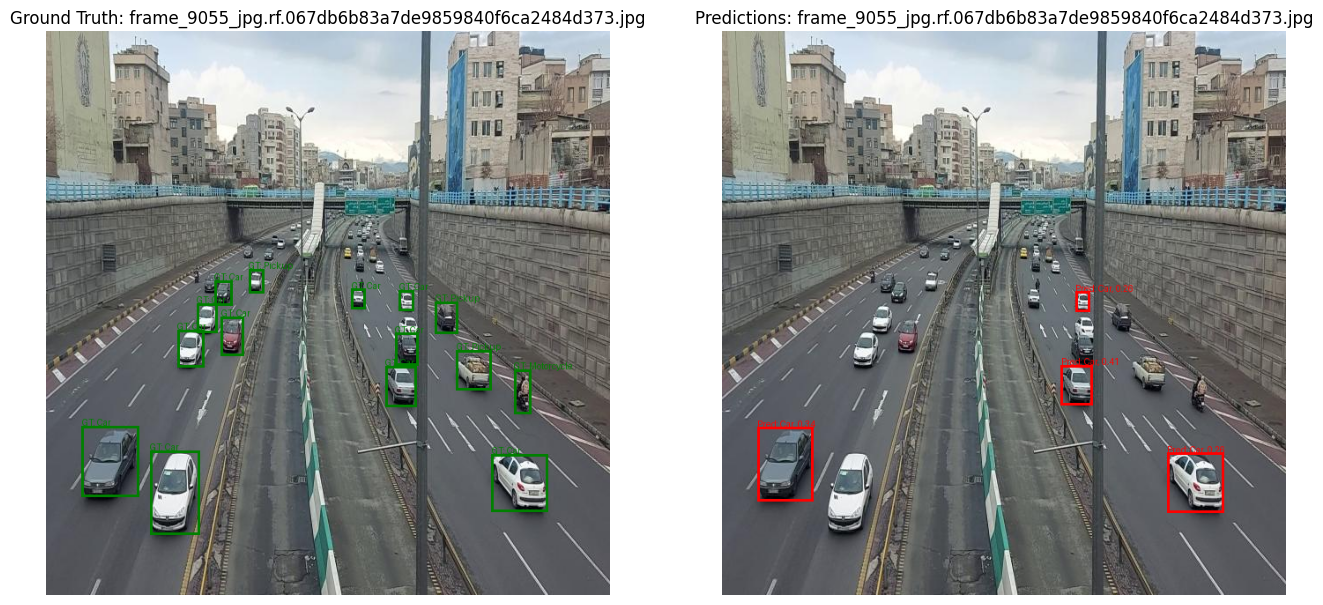


image 1/1 /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/test/images/frame_7020_jpg.rf.2253566dc05fca6e0181a517bab14339.jpg: 640x640 2 Cars, 19.8ms
Speed: 1.7ms preprocess, 19.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


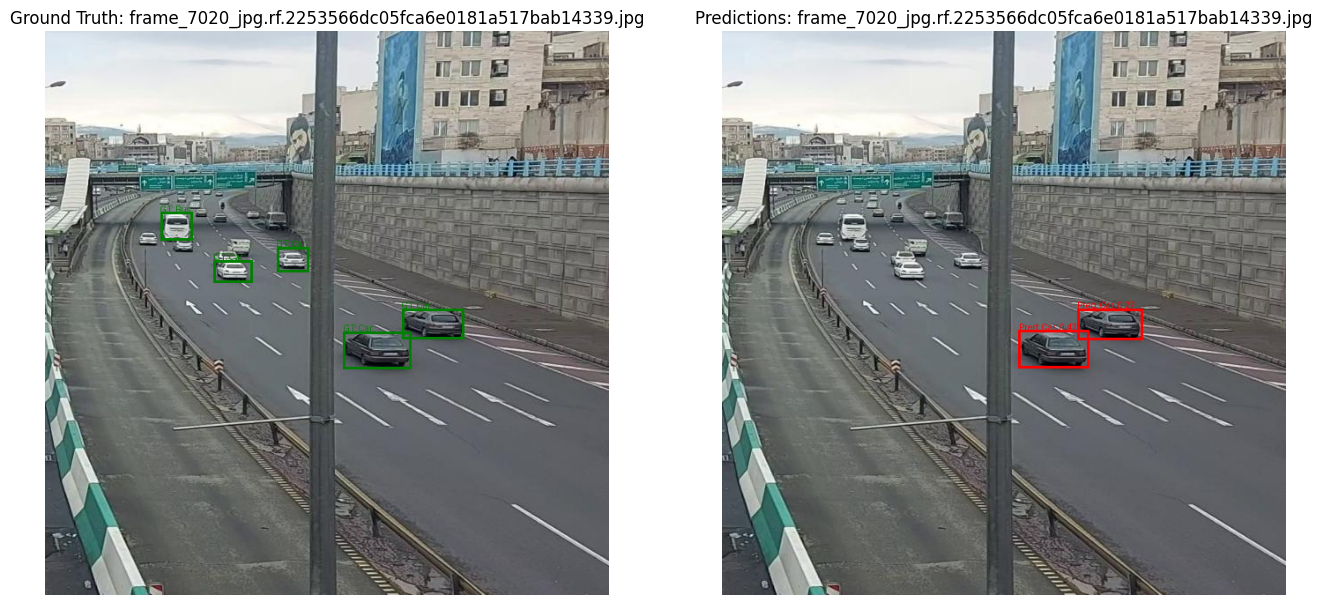


image 1/1 /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/test/images/frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0.jpg: 640x640 2 Cars, 20.7ms
Speed: 1.7ms preprocess, 20.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


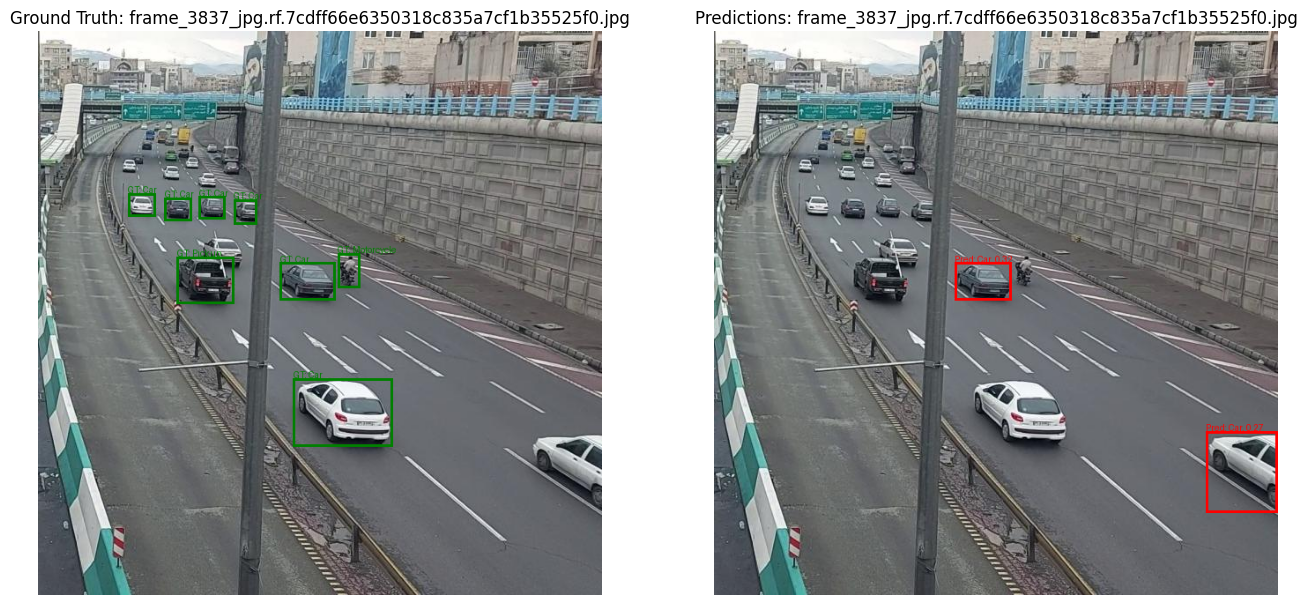

In [ ]:
import os
import random
import yaml
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Paths to the test images, labels, and data.yaml
test_images_path = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/test/images'  # Update if needed
test_labels_path = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/test/labels'  # Update if needed
data_yaml_path = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data.yaml'  # Path to data.yaml

# Load class names from data.yaml
with open(data_yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml['names']

# Get all test images
test_images = [file for file in os.listdir(test_images_path) if file.endswith(('.png', '.jpg'))]

random_images = random.sample(test_images, 3)

# Loop through the selected images
for random_image in random_images:
    image_path = os.path.join(test_images_path, random_image)
    label_path = os.path.join(test_labels_path, random_image.replace('.jpg', '.txt').replace('.png', '.txt'))

    # Run the prediction
    results = model.predict(source=image_path, save=False, conf=0.25)  # Adjust conf threshold as needed
    predicted_boxes = results[0].boxes.xyxy.cpu().numpy()  # Get predicted bounding boxes (x_min, y_min, x_max, y_max)
    predicted_classes = results[0].boxes.cls.cpu().numpy()  # Get predicted class IDs
    predicted_scores = results[0].boxes.conf.cpu().numpy()  # Get confidence scores

    # Read the ground truth labels
    ground_truth_boxes = []
    ground_truth_classes = []
    with open(label_path, 'r') as file:
        for line in file.readlines():
            parts = line.strip().split()
            cls, x_center, y_center, width, height = map(float, parts)
            ground_truth_classes.append(int(cls))
            x_min = (x_center - width / 2) * Image.open(image_path).width
            y_min = (y_center - height / 2) * Image.open(image_path).height
            x_max = (x_center + width / 2) * Image.open(image_path).width
            y_max = (y_center + height / 2) * Image.open(image_path).height
            ground_truth_boxes.append([x_min, y_min, x_max, y_max])

    # Open the image
    image = Image.open(image_path)

    # Draw ground truth boxes
    image_with_gt = image.copy()
    draw_gt = ImageDraw.Draw(image_with_gt)
    for box, cls in zip(ground_truth_boxes, ground_truth_classes):
        label = class_names[cls]  # Map class index to label name
        draw_gt.rectangle(box, outline="green", width=3)
        draw_gt.text((box[0], box[1] - 10), f"GT: {label}", fill="green")

    # Draw predicted boxes
    image_with_pred = image.copy()
    draw_pred = ImageDraw.Draw(image_with_pred)
    for box, cls, score in zip(predicted_boxes, predicted_classes, predicted_scores):
        label = class_names[int(cls)]  # Map class index to label name
        draw_pred.rectangle(box, outline="red", width=3)
        draw_pred.text((box[0], box[1] - 10), f"Pred: {label}, {score:.2f}", fill="red")

    # Display images
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.title(f"Ground Truth: {random_image}")
    plt.imshow(image_with_gt)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Predictions: {random_image}")
    plt.imshow(image_with_pred)
    plt.axis('off')

    plt.show()

In [ ]:
import albumentations
print(albumentations.__version__)

1.4.21


In [ ]:
import os
import cv2  # For image processing
import random
import numpy as np
from albumentations import Compose, Rotate, Resize, BboxParams
import shutil

In [ ]:
def read_yolo_labels(label_file):
    """Reads bounding boxes and classes from a YOLO label file."""
    with open(label_file, "r") as f:
        lines = f.readlines()
    bboxes = []
    for line in lines:
        cls, x, y, w, h = map(float, line.strip().split())
        bboxes.append([x, y, w, h, int(cls)])  # YOLO bbox format
    return bboxes

def write_yolo_labels(label_file, bboxes):
    """Writes bounding boxes and classes to a YOLO label file."""
    with open(label_file, "w") as f:
        for bbox in bboxes:
            cls, x, y, w, h = bbox[4], bbox[0], bbox[1], bbox[2], bbox[3]
            f.write(f"{cls} {x} {y} {w} {h}\n")

In [ ]:
def get_augmentation_pipeline():
    """Defines the augmentation pipeline."""
    return Compose(
        [
            Rotate(limit=45, p=0.5),  # Rotate images up to ±45 degrees
            Resize(640, 640)         # Resize images to YOLO standard input size
        ],
        bbox_params=BboxParams(format='yolo', label_fields=['class_labels'])
    )

In [ ]:
def apply_cutmix(image1, bboxes1, labels1, image2, bboxes2, labels2):
    """Applies CutMix by merging two images."""
    h, w, _ = image1.shape

    # Define random rectangle for CutMix
    cx = random.randint(0, w)
    cy = random.randint(0, h)
    cut_w = random.randint(w // 4, w // 2)
    cut_h = random.randint(h // 4, h // 2)

    x1 = max(0, cx - cut_w // 2)
    y1 = max(0, cy - cut_h // 2)
    x2 = min(w, cx + cut_w // 2)
    y2 = min(h, cy + cut_h // 2)

    # Overlay rectangle from image2 onto image1
    image1[y1:y2, x1:x2, :] = image2[y1:y2, x1:x2, :]

    # Combine bounding boxes and labels
    new_bboxes = bboxes1 + bboxes2
    new_labels = labels1 + labels2

    return image1, new_bboxes, new_labels

In [ ]:
def augment_and_save(image_file1, label_file1, image_file2, label_file2, augmentation_pipeline, output_image_dir, output_label_dir):
    # Load images and labels
    image1 = cv2.imread(image_file1)
    bboxes1 = read_yolo_labels(label_file1)

    image2 = cv2.imread(image_file2)
    bboxes2 = read_yolo_labels(label_file2)

    # Apply CutMix
    combined_image, combined_bboxes, combined_labels = apply_cutmix(image1, bboxes1, [0]*len(bboxes1), image2, bboxes2, [0]*len(bboxes2))

    # Apply rotation
    augmented = augmentation_pipeline(image=combined_image, bboxes=combined_bboxes, class_labels=combined_labels)
    augmented_image = augmented['image']
    augmented_bboxes = augmented['bboxes']

    # Save augmented data
    cv2.imwrite(os.path.join(output_image_dir, os.path.basename(image_file1)), augmented_image)
    write_yolo_labels(os.path.join(output_label_dir, os.path.basename(label_file1)), augmented_bboxes)

In [ ]:
# Paths for original and augmented data
train_images_dir = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/images'
train_labels_dir = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/labels'
augmented_images_dir = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/augmented_images'
augmented_labels_dir = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/augmented_labels'

# Paths for combined dataset
combined_images_dir = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/combined_images'
combined_labels_dir = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/combined_labels'

# Create combined directories if they don't exist
os.makedirs(augmented_images_dir, exist_ok=True)
os.makedirs(augmented_labels_dir, exist_ok=True)
os.makedirs(combined_images_dir, exist_ok=True)
os.makedirs(combined_labels_dir, exist_ok=True)



In [ ]:
# Initialize augmentation pipeline
augmentation_pipeline = get_augmentation_pipeline()

# List image and label files
image_files = sorted(os.listdir(train_images_dir))
label_files = sorted(os.listdir(train_labels_dir))

# Apply augmentation for each pair of images
for i in range(0, len(image_files) - 1, 2):  # Process in pairs
    augment_and_save(
        os.path.join(train_images_dir, image_files[i]),
        os.path.join(train_labels_dir, label_files[i]),
        os.path.join(train_images_dir, image_files[i+1]),
        os.path.join(train_labels_dir, label_files[i+1]),
        augmentation_pipeline,
        augmented_images_dir,
        augmented_labels_dir
    )

In [ ]:
for img_file in os.listdir(train_images_dir):
    shutil.copy(
        os.path.join(train_images_dir, img_file),
        os.path.join(combined_images_dir, img_file)
    )

for lbl_file in os.listdir(train_labels_dir):
    shutil.copy(
        os.path.join(train_labels_dir, lbl_file),
        os.path.join(combined_labels_dir, lbl_file)
    )

In [ ]:
for img_file in os.listdir(augmented_images_dir):
    shutil.copy(
        os.path.join(augmented_images_dir, img_file),
        os.path.join(combined_images_dir, img_file)
    )

for lbl_file in os.listdir(augmented_labels_dir):
    shutil.copy(
        os.path.join(augmented_labels_dir, lbl_file),
        os.path.join(combined_labels_dir, lbl_file)
    )

In [ ]:
model = YOLO('yolov9t.pt')

results = model.train(
    data='/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data_augmented.yaml',
    epochs=200,
    batch=32,
    verbose=True
)

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov9t.pt, data=/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data_augmented.yaml, epochs=20, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

train: Scanning /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/combined_images... 0 images, 136 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<00:00, 316.61it/s]

train: WARNING ⚠️ No labels found in /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/combined_images.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


train: New cache created: /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/combined_images.cache
WARNING ⚠️ No labels found in /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/combined_images.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.32G          0        218          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         28        563     0.0012      0.121    0.00616     0.0023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       5.3G          0        218          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         28        563    0.00108       0.12    0.00986    0.00332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.32G          0      214.8          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         28        563   0.000974     0.0845    0.00111   0.000483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.32G          0      208.3          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         28        563   0.000413     0.0568   0.000691    0.00029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.32G          0      200.1          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         28        563   0.000418     0.0534   0.000339   8.07e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.32G          0      189.7          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         28        563   0.000432     0.0534    0.00083   0.000144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.32G          0      180.8          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         28        563   0.000335     0.0505   0.000383   7.87e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.32G          0        175          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]


                   all         28        563   0.000192       0.05   0.000245   3.51e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.32G          0      170.2          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         28        563   9.55e-05      0.025    6.2e-05    1.2e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.32G          0      167.4          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         28        563   0.000195       0.05   0.000149   2.25e-05


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       5.5G          0      163.8          0          0        640: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         28        563   0.000172       0.05   0.000116   2.91e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.32G          0      161.8          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         28        563   0.000142       0.05   0.000108   1.08e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.32G          0      160.8          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         28        563   0.000142       0.05   0.000108   1.08e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.32G          0      158.1          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         28        563   0.000117       0.05   0.000146   1.46e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.32G          0      156.6          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         28        563   0.000154     0.0284   8.78e-05   8.78e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.32G          0      155.1          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         28        563   0.000294     0.0505   0.000185   2.99e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.32G          0      153.8          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         28        563    0.00039     0.0539   0.000233   4.07e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.32G          0      152.7          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         28        563   0.000317     0.0505   0.000188   3.55e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.32G          0      151.9          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         28        563   0.000322     0.0505   0.000192   3.04e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.32G          0      152.5          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         28        563    0.00036     0.0505   0.000208    3.1e-05



20 epochs completed in 0.020 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 4.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 4.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv9t summary (fused): 486 layers, 1,971,759 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]


                   all         28        563    0.00108       0.12     0.0083    0.00286
                   Bus          6          6   0.000709      0.167     0.0333    0.00999
                   Car         23        398    0.00139    0.00754   0.000703   0.000211
            Motorcycle         18         92          0          0          0          0
                Pickup         22         59    0.00239     0.0508     0.0021     0.0017
                 Truck          8          8   0.000929      0.375    0.00538    0.00239
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2
